In [1]:
from sympy import symbols, Function, Eq, dsolve, exp

# Define symbols
t = symbols('t')
gamma = symbols('gamma', constant=True)
S0, I0, R0 = symbols('S0 I0 R0', constant=True)
# S0, I0, R0 = [762, 800, 0]

S = Function('S')(t)
I = Function('I')(t)
R = Function('R')(t)

# Define the differential equations
eq1 = Eq(S.diff(t), 0)
eq2 = Eq(I.diff(t), -gamma * I)
eq3 = Eq(R.diff(t), gamma * I)

# Solve the differential equations
sol_S = dsolve(eq1, S, ics={S.subs(t, 0): S0})
sol_I = dsolve(eq2, I, ics={I.subs(t, 0): I0})
sol_R = dsolve(eq3, R, ics={R.subs(t, 0): R0})

sol_S, sol_I, sol_R


(Eq(S(t), S0),
 Eq(I(t), I0*exp(-gamma*t)),
 Eq(R(t), R0 + gamma*Integral(I(t), t) - gamma*Integral(I(t), (t, 0))))

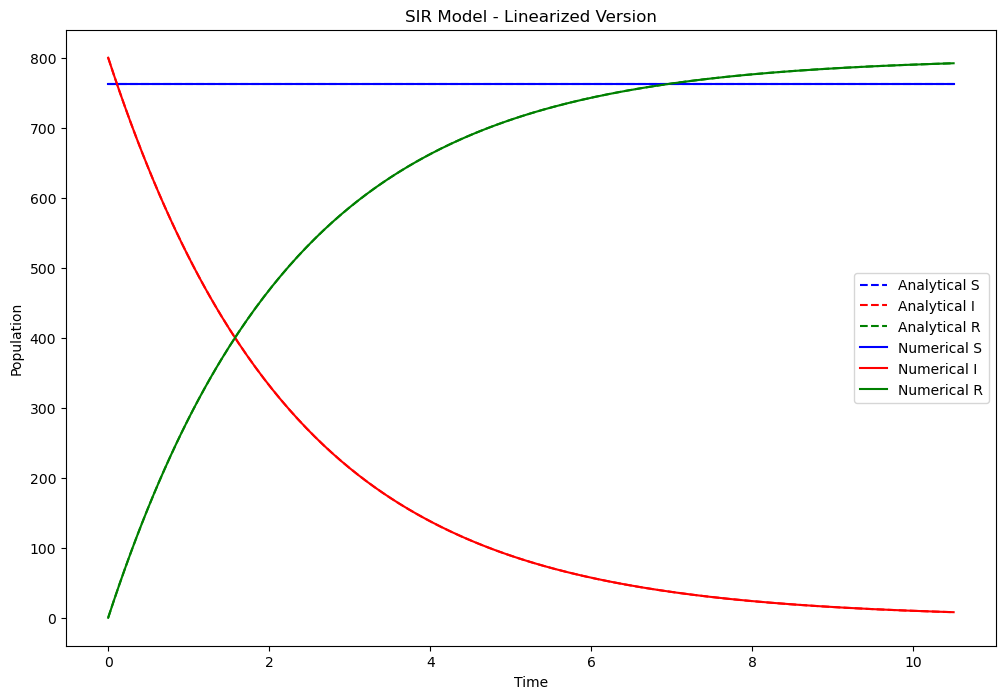

In [29]:
import scipy.integrate as spi
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# Define the modified linear system
def linear_sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = 0
    dIdt = -gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Parameters for the modified system
beta_value = 0.001  # Adjusted beta value for the linear model
gamma_value = 0.44  # Recovery rate

# Initial conditions
initial_conditions = [762, 800, 0]

# Time span
time_space_linear = [0, 10.5]
t_eval_linear = np.linspace(time_space_linear[0], time_space_linear[1], 300)

# Solve the linear system numerically
sol_linear = solve_ivp(linear_sir_model, time_space_linear, initial_conditions, 
                       args=(beta_value, gamma_value), t_eval=t_eval_linear, method='RK45')


# Solve the linear system analytically
S_analytical = np.array([initial_conditions[0] for _ in range(len(t_eval_linear))])
I_analytical = initial_conditions[1] * np.exp((-gamma_value) * t_eval_linear)
R_analytical = initial_conditions[2] + initial_conditions[1] * (1 - np.exp((-gamma_value) * t_eval_linear))
#R_analytical = dsolve(eq3, R, ics={R.subs(t, 0): R0})


# Plotting both analytical and numerical solutions
plt.figure(figsize=(12, 8))
plt.plot(t_eval_linear, S_analytical, 'b--', label='Analytical S')
plt.plot(t_eval_linear, I_analytical, 'r--', label='Analytical I')
plt.plot(t_eval_linear, R_analytical, 'g--', label='Analytical R')

plt.plot(sol_linear.t, sol_linear.y[0], 'b-', label='Numerical S')
plt.plot(sol_linear.t, sol_linear.y[1], 'r-', label='Numerical I')
plt.plot(sol_linear.t, sol_linear.y[2], 'g-', label='Numerical R')


plt.title('SIR Model - Linearized Version')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

In [28]:
#t,S,I,R=sp.symbols('t S I R')
# beta=2.18*10**-3
# gamma=0.44
# sys= lambda t,y:[-beta*y[0]*y[1],beta*y[0]*y[1]-gamma*y[1],gamma*y[1]]
# time=[0,10.5]
# h=0.7
# init=[762,800,0]
# start=0
# end=10.5
# time=[0,10.5]
# points=np.linspace(start,end,100)
# sol=solve_ivp(sys,[start,end],init,method='RK45',t_eval=points)
# fig,ax=plt.subplots()
# ax.plot(sol.t,sol.y[0],color='red',linestyle='dotted',label='Susceptible')
# ax.plot(sol.t,sol.y[1],color='blue',linestyle='dotted',label='Infectives')
# ax.plot(sol.t,sol.y[2],color='green',linestyle='dotted',label='Recovered')
# plt.title("SIR Model- Non Linearized system")
# ax.legend()
# plt.show()

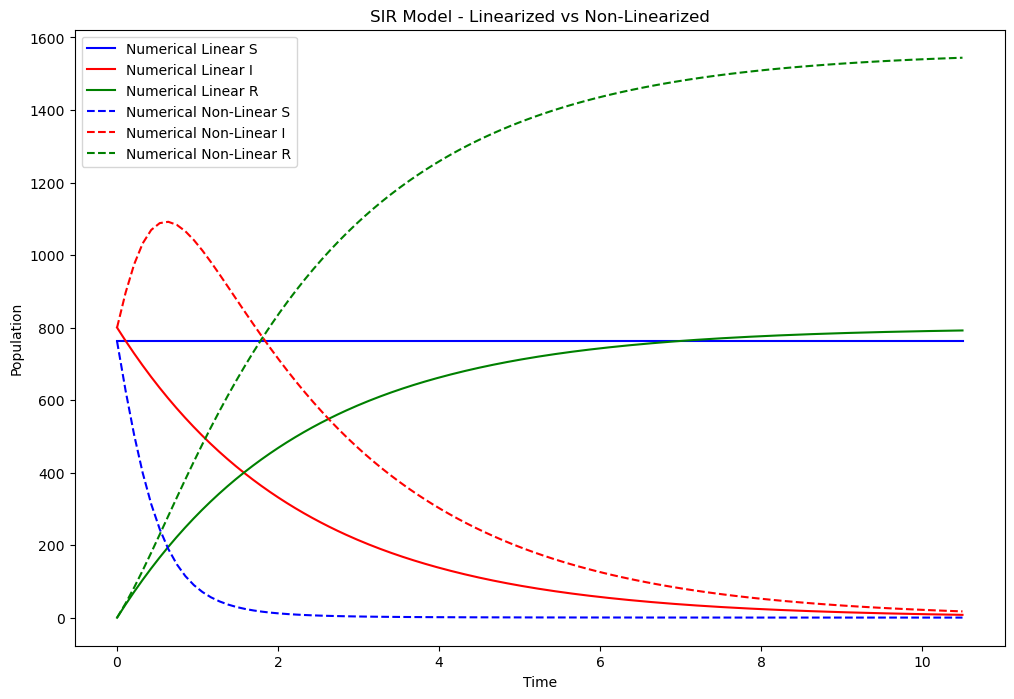

In [27]:
import scipy.integrate as spi
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the modified linear system
def linear_sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = 0
    dIdt = -gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Parameters for the modified system
beta_value = 0.001  # Adjusted beta value for the linear model
gamma_value = 0.44  # Recovery rate

# Initial conditions
initial_conditions = [762, 800, 0]

# Time span for the linear system
time_space_linear = [0, 10.5]
t_eval_linear = np.linspace(time_space_linear[0], time_space_linear[1], 300)

# Solve the linear system numerically
sol_linear = solve_ivp(linear_sir_model, time_space_linear, initial_conditions, 
                       args=(beta_value, gamma_value), t_eval=t_eval_linear, method='RK45')

# Define the non-linear system
sys = lambda t, y: [-beta * y[0] * y[1], beta * y[0] * y[1] - gamma * y[1], gamma * y[1]]

# Time span for the non-linear system
time_space_non_linear = [0, 10.5]
points = np.linspace(time_space_non_linear[0], time_space_non_linear[1], 100)

# Solve the non-linear system numerically
sol_non_linear = solve_ivp(sys, time_space_non_linear, initial_conditions, method='RK45', t_eval=points)

# Plot both solutions on a single graph
plt.figure(figsize=(12, 8))
plt.plot(sol_linear.t, sol_linear.y[0], 'b-', label='Numerical Linear S')
plt.plot(sol_linear.t, sol_linear.y[1], 'r-', label='Numerical Linear I')
plt.plot(sol_linear.t, sol_linear.y[2], 'g-', label='Numerical Linear R')

plt.plot(sol_non_linear.t, sol_non_linear.y[0], 'b--', label='Numerical Non-Linear S')
plt.plot(sol_non_linear.t, sol_non_linear.y[1], 'r--', label='Numerical Non-Linear I')
plt.plot(sol_non_linear.t, sol_non_linear.y[2], 'g--', label='Numerical Non-Linear R')

plt.title('SIR Model - Linearized vs Non-Linearized')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


In [4]:
import sympy as sp

t = sp.symbols('t')
x = sp.Function('x')(t)
y = sp.Function('y')(t)

eq1 = sp.Eq(x.diff(t), 5*x + y)
eq2 = sp.Eq(y.diff(t), x + 5*y)

sol_x = dsolve(eq1, x)
sol_y = dsolve(eq2, y)

print(sol_x)
print(sol_y)


Eq(-5*Integral(x(t)*exp(-5*t), t) - Integral(y(t)*exp(-5*t), t), C1)
Eq(-Integral(x(t)*exp(-5*t), t) - 5*Integral(y(t)*exp(-5*t), t), C1)
